# 1. 얼굴 및 눈 감지를 위해 OpenCV Haar 캐스케이드 구성

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## cascade 파일 읽기

In [2]:
face_cascade = cv2.CascadeClassifier("./data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./data/haarcascade_eye.xml")

## 얼굴 이미지 데이터 읽기

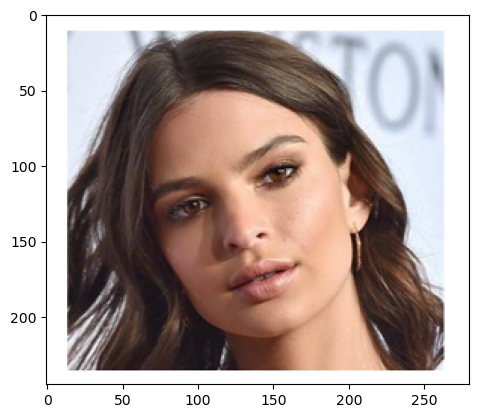

In [3]:
face_image = cv2.imread("./data/face01.png")
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)
face_image_copy = face_image.copy()

plt.imshow(face_image)
plt.show()

## 2. 얼굴 이미지 바운딩 박스 처리: 케이스케이드 경우는 그레이 스케일 이미지에서만 작동 !!!

얼굴 객체 인식 좌표 :  49 48 161 161


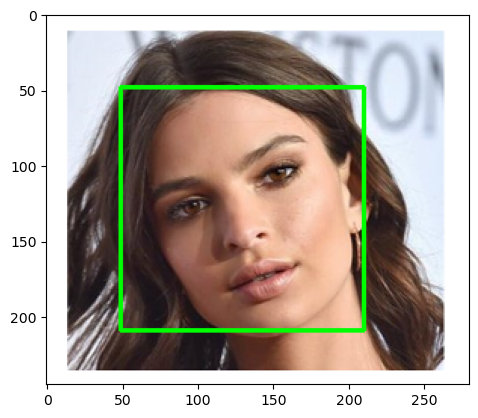

In [4]:
face_gray_image = cv2.cvtColor(face_image, cv2.COLOR_RGB2GRAY)

faces_box_info = face_cascade.detectMultiScale(face_gray_image, 1.1, 4) # 뒤에 숫자는 이미지에 따라 다르게

for (x,y,w,h) in faces_box_info : 
    print("얼굴 객체 인식 좌표 : " , x,y,w,h)
    cv2.rectangle(face_image, (x,y), (x+w, y+h), (0,255,0), 2)
    
plt.imshow(face_image)
plt.show()

### 3. 눈 감지 

[[31 64 32 32]
 [84 39 38 38]]
0 31 64 32 32
1 84 39 38 38


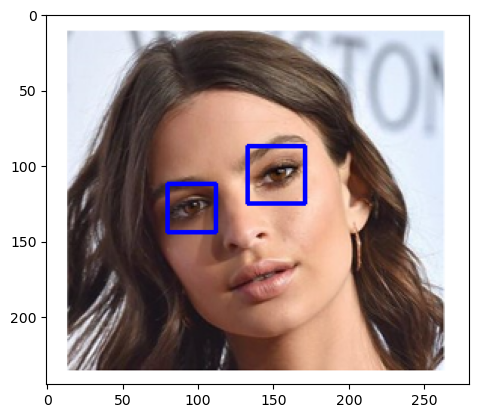

In [5]:
roi_gray = face_gray_image[y:(y+h), x:(x+w)]
roi_color = face_image_copy[y:(y+h), x:(x+w)]

eyes_box_info = eye_cascade.detectMultiScale(roi_gray)

print(eyes_box_info)

for i , (ex, ey, ew, eh) in enumerate(eyes_box_info):
    print(i, ex, ey, ew, eh)
    if i == 0 :
        eye_1 = (ex, ey, ew, eh)
    elif i == 1 :
        eye_2 = (ex, ey, ew, eh)
        
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,0,255), 2)
    
plt.imshow(face_image_copy)
plt.show()

### 얼굴 정렬 - 01

In [6]:
print(eye_1[0], eye_2[0])

if eye_1[0] < eye_2[0] :
    left_eye = eye_1
    right_eye = eye_2 
else :
    left_eye = eye_2
    right_eye = eye_1
    
print(left_eye, right_eye)

31 84
(31, 64, 32, 32) (84, 39, 38, 38)


left eye center 좌표 :  47 80
right_eye center 좌표 :  103 58


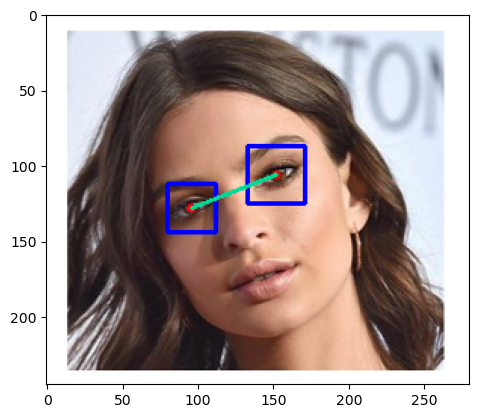

In [7]:
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_center_x = left_eye_center[0]
left_eye_center_y = left_eye_center[1]

print("left eye center 좌표 : ", left_eye_center_x, left_eye_center_y)

right_eye_center = (int(right_eye[0] + (right_eye[2] / 2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_center_x = right_eye_center[0]
right_eye_center_y = right_eye_center[1]

print("right_eye center 좌표 : ", right_eye_center_x, right_eye_center_y)

cv2.circle(roi_color, left_eye_center, 3, (255,0,0), -1) # 3은 원의 넓이
cv2.circle(roi_color, right_eye_center, 3, (255,0,0), -1)
cv2.line(roi_color, left_eye_center, right_eye_center, (0,220,150), 2)

plt.imshow(face_image_copy)
plt.show()

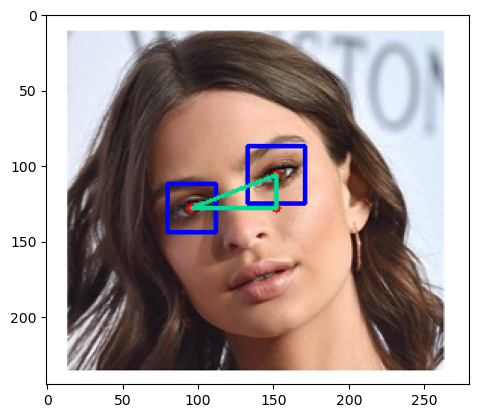

In [8]:
if left_eye_center_y > right_eye_center_y : 
    A = (right_eye_center_x, left_eye_center_y)
    direction = -1
else : 
    A = (left_eye_center_x, right_eye_center_y)
    direction = 1
    
cv2.circle(roi_color, A, 3, (255,0,0), -1)
cv2.line(roi_color, left_eye_center, A, (0,220,150), 2)
cv2.line(roi_color, right_eye_center, A, (0,220,150), 2)

plt.imshow(face_image_copy)
plt.show()

# 각도 계산 

In [9]:
delta_x = right_eye_center_x - left_eye_center_x
delta_y = right_eye_center_y - left_eye_center_y

angle = np.arctan(delta_y / delta_x)
angle = (angle * 180) / np.pi
print(angle)

-21.447736327105353


### 이미지를 각도 세타 만큼 회전 

이미지 height, width 값 >>  245 280
image cneter values >>  (140, 122)
[[  0.93075149  -0.36565237  54.30438035]
 [  0.36565237   0.93075149 -42.74301434]]


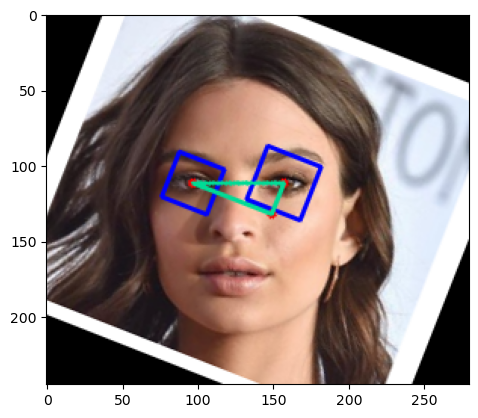

In [10]:
height, width, _ = face_image_copy.shape
print("이미지 height, width 값 >> " , height, width)

image_center = (width // 2 , height // 2)
print("image cneter values >> " , image_center )

M = cv2.getRotationMatrix2D(image_center, (angle), 1.0)
print(M)

rotated = cv2.warpAffine(face_image_copy, M , (width, height))

plt.imshow(rotated)
plt.show()